In [1]:
import pandas as pd 
import json
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties

In [41]:
def streaming_data() -> pd.DataFrame:
    df = pd.read_json("../data/StreamingHistory0.json").append(pd.read_json("../data/StreamingHistory1.json"))
    df['endTime'] = pd.to_datetime(df['endTime'])
    df = df[df.endTime >= pd.to_datetime("01-01-2021")]
    return df
    
df = streaming_data()
podcasts = ["Dimension 20", "Ologies with Alie Ward", "The Yard", "Dear Hank & John", "You Can Sit With Us", 
            "The TryPod", "Cortex", "Erin is the Funny One", "The Gus & Eddy Podcast", 'A Conversation With...', 
            "The Numberphile Podcast", "The Joe Rogan Experience", "Lex Fridman Podcast", "Good For You", 
            "The Anthropocene Reviewed", "The Tiny Meat Gang Podcast", "WorkLife with Adam Grant", 
            "Up First", "The 3b1b podcast", "The Gotham City Podcast", "HealthyGamerGG"]
df = df[~df.artistName.isin(podcasts)]
df

,endTime,artistName,trackName,msPlayed
268,2021-01-01 03:08:00,Chris King,Evil Kunevil (feat. Trippie Redd),14762
269,2021-01-01 03:16:00,Playboi Carti,Over,426
270,2021-01-01 03:47:00,100 gecs,stupid horse (Remix) [feat. GFOTY & Count Baldor],41122
271,2021-01-01 03:49:00,100 gecs,hand crushed by a mallet (Remix) [feat. Fall O...,103886
272,2021-01-01 03:50:00,Little Big,Hypnodancer,57446
...,...,...,...,...
2161,2021-12-17 18:22:00,Taylor Swift,"no body, no crime (feat. HAIM)",215626
2162,2021-12-17 18:26:00,Taylor Swift,champagne problems,244000
2163,2021-12-17 18:30:00,Taylor Swift,tolerate it,245440
2164,2021-12-17 18:33:00,Taylor Swift,closure,180653


In [46]:
df['month'] = df.endTime.dt.month
total_listened = []
top_artist = []
for month in range(1, 13): 
    month_df = df[df.month == month]
    grouped_df = month_df.groupby('artistName')\
        .agg({"endTime": "count", 
              "msPlayed": "sum"})\
        .reset_index()\
        .rename(columns={"endTime": "count"})\
        .sort_values(by="msPlayed", ascending = False)
    total_listened.append(int(grouped_df.msPlayed.sum()/1000/60))
    top_artist.append(grouped_df.iloc[0]["artistName"])
    
print(total_listened)
print(top_artist)

[3380, 2607, 1229, 1878, 2453, 2128, 1427, 1858, 3561, 5329, 3608, 953]
['Taylor Swift', 'Taylor Swift', 'Phoebe Bridgers', 'Glass Animals', 'Sweet Trip', 'Sweet Trip', 'Charli XCX', 'Magic City Hippies', 'Hotel Fiction', 'Flipturn', 'Taylor Swift', 'Taylor Swift']


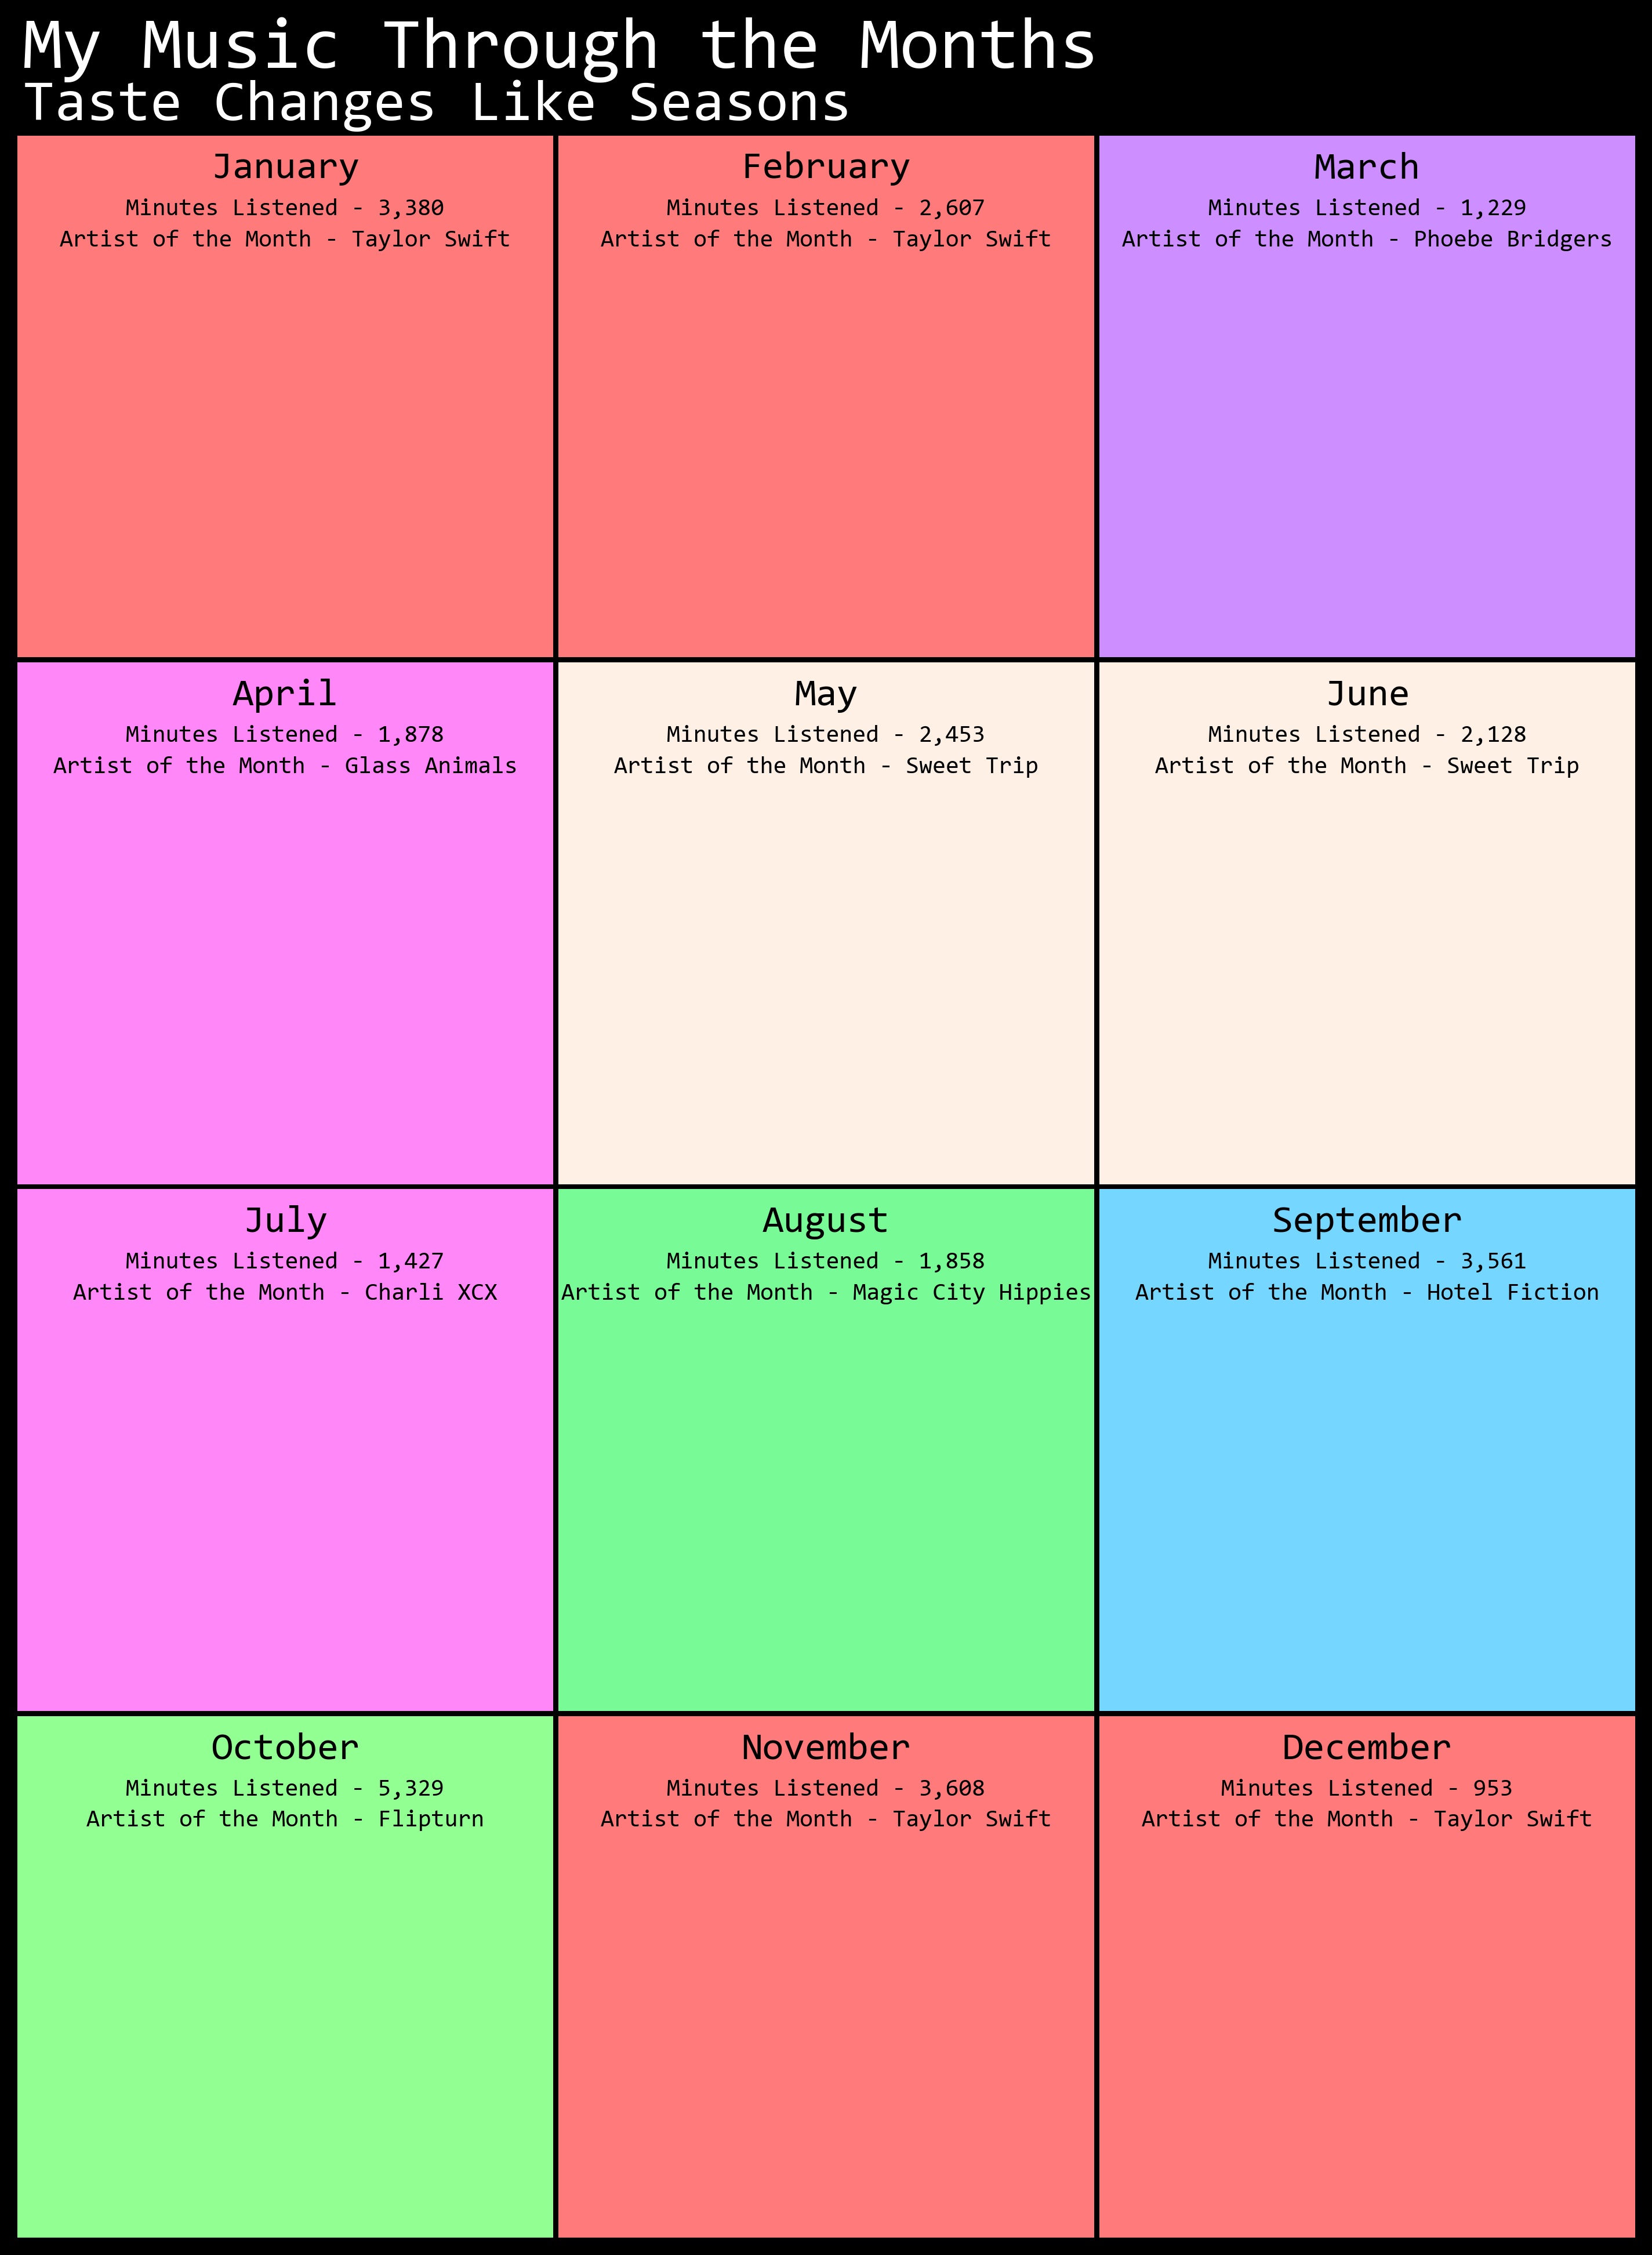

In [110]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", 
          "October", "November", "December"]

plt.rcParams["figure.figsize"] = [12, 16]
plt.rcParams["figure.dpi"] = 300

fig, axes = plt.subplots(4, 3)
font = FontProperties()
font.set_name("Consolas")
colors = {"Taylor Swift": "#ff7a7a", 
          "Phoebe Bridgers": "#cd8fff", 
          "Hotel Fiction": "#75d6ff", 
          "Glass Animals": "#ff87f7",
          "Sweet Trip": "#fff0e6", 
          "Charli XCX": "#ff87f7", 
          "Magic City Hippies": "#78fa96", 
          "Flipturn": "#91ff91"}

for i, ax in enumerate(axes.flatten()): 
    ax.text(0.5, 0.97, months[i], ha = "center", va = "top", fontsize = 16, fontproperties=font)
    
    #no ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    #no spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.text(0.5, 0.8, f"Artist of the Month - {top_artist[i]}", ha = "center", va = "center", fontproperties = font)
    ax.text(0.5, 0.86, f"Minutes Listened - {total_listened[i]:,}", ha = "center", va="center", fontproperties = font)
    ax.set_facecolor(colors[top_artist[i]])
    
spacing = 0.01
fig.set_facecolor("black")
axes[0][0].text(0.01, 1.13, "My Music Through the Months", color = 'w', fontproperties=font, fontsize=30)
axes[0][0].text(0.01, 1.03, "Taste Changes Like Seasons", color = 'w', fontproperties=font, fontsize=24)
plt.subplots_adjust(wspace=spacing, hspace=spacing)
plt.savefig("../plots/through_the_months/base_plot.png")